In [2]:
# Import libraries

# for manipulation
import pandas as pd
import numpy as np 
import os

# for visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
sns.set_style("whitegrid")

In [3]:
# Gather data

df_raw = pd.read_csv('vgsales.csv')
df_raw.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## The questions about this dataset:
*** 

1) Which are the most popular genres?

2) Which is the most popular platform?

3) Which games have been the most popular?

4) How many games were made each year?

5) Where the video games industry have had more sales?

6) Which genre was sold the most in each region?


## Cleaning the data
***

In [4]:
# Info about the dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df_raw.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
# Looking for duplicates
df_raw.duplicated().sum()

0

In [7]:
# Looking for null values
df_raw.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
# Visualizating null values
df_raw[df_raw['Year'].isnull()].sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6832,6834,Singularity,PS3,NaN,Shooter,Unknown,0.17,0.04,0.01,0.03,0.24
9692,9694,WRC: FIA World Rally Championship,X360,NaN,Racing,Black Bean Games,0.00,0.10,0.00,0.02,0.12
5913,5915,Harvest Moon: The Tale of Two Towns,3DS,NaN,Simulation,Unknown,0.28,0.00,0.00,0.02,0.30
13675,13677,Luxor: Pharaoh's Challenge,Wii,NaN,Puzzle,Funsta,0.01,0.03,0.00,0.00,0.04
6314,6316,Gun,X360,NaN,Shooter,Activision,0.24,0.01,0.00,0.02,0.27
14997,15000,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02
8086,8088,Backbreaker,X360,NaN,Sports,Unknown,0.17,0.00,0.00,0.01,0.18
15739,15742,Football Manager 2007,X360,NaN,Sports,Sega,0.00,0.01,0.00,0.00,0.02
14876,14879,Combat Wings: The Great Battles of WWII,Wii,NaN,Simulation,City Interactive,0.02,0.00,0.00,0.00,0.03
6316,6318,Flag Capture,2600,NaN,Action,Atari,0.25,0.02,0.00,0.00,0.27


In [9]:
# Deleting null values
df_raw = df_raw.dropna(how='any')

In [10]:
# Checking result
df_raw.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [11]:
# Converting Column
df_raw['Year'] = df_raw['Year'].astype('int64')
df_raw['NA_Sales'] = df_raw['NA_Sales'].astype('float64')
df_raw['EU_Sales'] = df_raw['EU_Sales'].astype('float64')
df_raw['JP_Sales'] = df_raw['JP_Sales'].astype('float64')
df_raw['Other_Sales'] = df_raw['Other_Sales'].astype('float64')
df_raw['Other_Sales'] = df_raw['Other_Sales'].astype('float64')

In [12]:
# Checking errors
df_raw['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [13]:
# Checking errors
df_raw['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [14]:
# Sorting the dataframe by Year
df_raw = df_raw.sort_values(by=('Year'))

In [15]:
# Creating a copy of the dataframe
df = df_raw.copy()
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
6317,6319,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.0,0.00,0.27
1969,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
5366,5368,Freeway,2600,1980,Action,Activision,0.32,0.02,0.0,0.00,0.34
1766,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15


***
## **QUESTION 1**
Which are the most popular genres ?
***


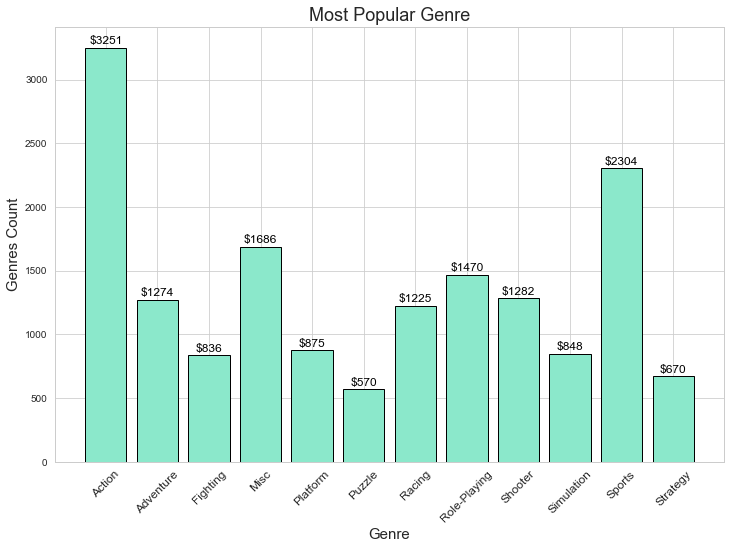

In [16]:
# Creating a bar chart to display genres count
genres_count = df.groupby('Genre').count()['Rank']
index_genres = genres_count.index

sns.set_style("whitegrid")
plt.bar(index_genres,genres_count,color='#8BE8CB',edgecolor='black',linewidth=1)
plt.xticks(index_genres,rotation = '45', size = 12)
plt.ylabel('Genres Count',size=15)
plt.xlabel('Genre',size=15)
plt.title('Most Popular Genre',size=18)

for k, v in genres_count.items():
        plt.text (k, v+30, '$' + str(v), fontsize = 12, rotation = 0, color = 'black', ha = 'center')
    

plt.show()

### Answer for question 1

As we can see from the plot above, Action and Sports are the most popular genres

***
## **QUESTION 2**
Which is the most popular platoform ?
***


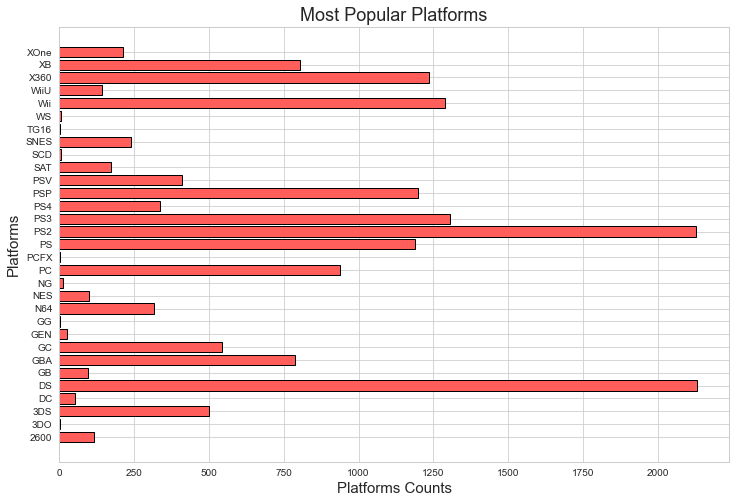

In [17]:
# Creating a bar chart to compare platforms popularity
platform_counts = df.groupby('Platform').count()['Rank']
index_platforms = platform_counts.index


plt.barh(index_platforms,platform_counts,color='#FF5E5B',edgecolor='black',linewidth=1)
plt.ylabel('Platforms',size=15)
plt.xlabel('Platforms Counts',size=15)
plt.title('Most Popular Platforms',size=18)

plt.show()


### Answer for question 2

The most popular platforms are: DS, PS2 & PS3

***
## **QUESTION 3**
Which games have been the most popular ?
***


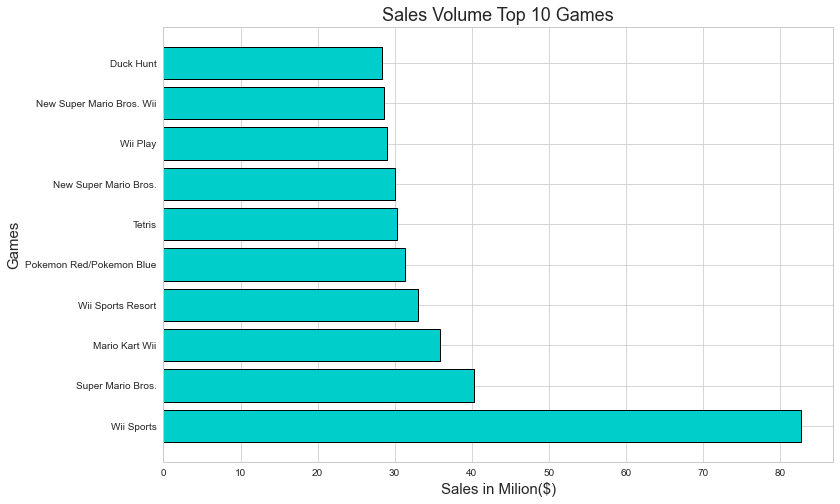

In [18]:
# Creating a bar chart to compare the top 10 games
df_games = df.sort_values(by='Global_Sales',ascending=False)
top_10_games = df_games.head(10).Global_Sales
index_top_games = df_games.head(10).Name

plt.barh(index_top_games,top_10_games,color='#00CECB',edgecolor='black',linewidth=1)
plt.ylabel('Games',size=15)
plt.xlabel('Sales in Milion($)',size=15)
plt.title('Sales Volume Top 10 Games',size=18)
plt.show()

In [19]:
# Displaying a table with top 10 games info
df_games[['Name','Platform','Publisher','Global_Sales']].head(10)

,Name,Platform,Publisher,Global_Sales
0,Wii Sports,Wii,Nintendo,82.74
1,Super Mario Bros.,NES,Nintendo,40.24
2,Mario Kart Wii,Wii,Nintendo,35.82
3,Wii Sports Resort,Wii,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,Nintendo,31.37
5,Tetris,GB,Nintendo,30.26
6,New Super Mario Bros.,DS,Nintendo,30.01
7,Wii Play,Wii,Nintendo,29.02
8,New Super Mario Bros. Wii,Wii,Nintendo,28.62
9,Duck Hunt,NES,Nintendo,28.31


### Answer for question 3

The 3 most purchased games have been: Wii Sports, Super Mario Bros & Mario Kart Wii. Also we can clearly see from the table above that all the top 10 games were produced by Nintendo

***
## **QUESTION 4**
How many games were made each year ?
***


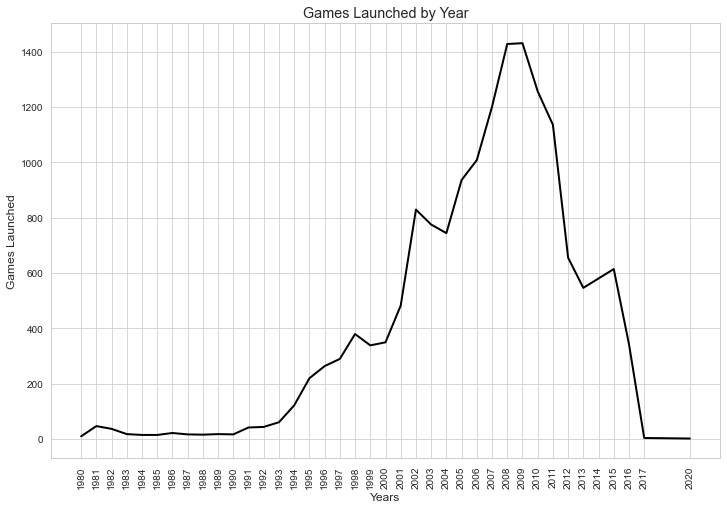

In [20]:
# Creating a line chart to display games launched each year
games_by_year = df.groupby('Year').count()['Rank']
index_games = games_by_year.index

plt.plot(index_games,games_by_year,color='black',lw=2)
plt.xticks(index_games,rotation = '90', size = 10)
plt.ylabel('Games Launched')
plt.xlabel('Years')
plt.title('Games Launched by Year')
plt.show()

***
## **QUESTION 5**
Where the video games industry have had more sales?
***


In [21]:
# Creating a new data frame with region total sales
NA_sales = df.NA_Sales.sum()
EU_sales = df.EU_Sales.sum()
JP_sales = df.JP_Sales.sum()
OT_sales = df.Other_Sales.sum()

data_regions = {
    'Regions':['NA_sales','EU_sales','JP_sales','OT_sales'],
    'Sales':[NA_sales,EU_sales,JP_sales,OT_sales]
}
region_df = pd.DataFrame(data=data_regions)
region_df

,Regions,Sales
0,NA_sales,4327.65
1,EU_sales,2406.69
2,JP_sales,1284.27
3,OT_sales,788.91


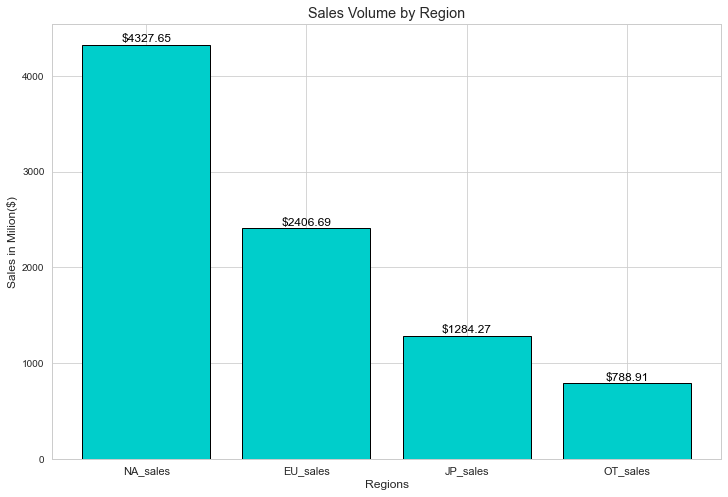

In [22]:
# Creating a bar chart to compare sales from different regions
plt.bar(region_df.Regions,region_df.Sales,color='#00CECB',edgecolor='black',linewidth=1)
plt.xticks(region_df.Regions, size=11)
plt.ylabel('Sales in Milion($)')
plt.xlabel('Regions')
plt.title('Sales Volume by Region')

for k, v in region_df.Sales.items():
        plt.text (k, v+30, '$' + str(round(v,2)), fontsize = 12, rotation = 0, color = 'black', ha = 'center')
    
plt.show()

### Answer for question 5

North America (NA) is the region where video games were sold the most followed by Europe and Japan

***
## **QUESTION 6**
Which genre was sold the most in each region ?
***


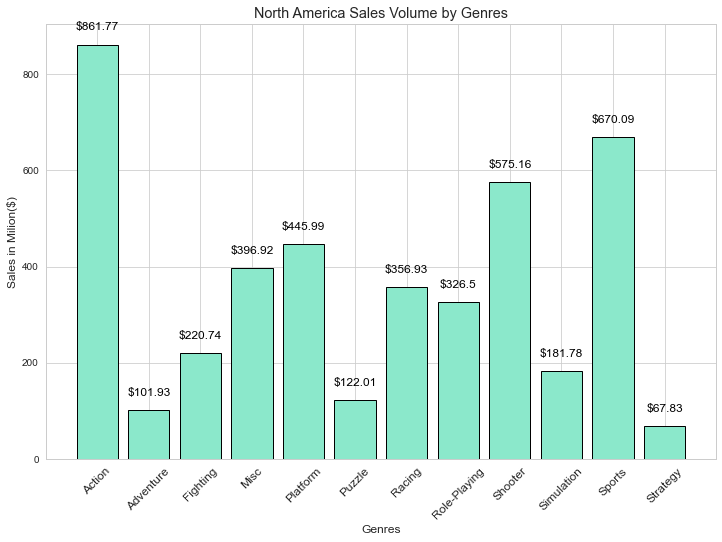

In [37]:
# Creating a bar chart to display sales for North America by Genre
genre_list_NA = df.groupby('Genre').sum()['NA_Sales']
genre_index_NA = genre_list_NA.index

plt.bar(genre_index_NA,genre_list_NA,color='#8BE8CB',edgecolor='black',linewidth=1)
plt.xticks(genre_index_NA,rotation = '45', size = 12)
plt.ylabel('Sales in Milion($)')
plt.xlabel('Genres')
plt.title('North America Sales Volume by Genres')

for k, v in genre_list_NA.items():
        plt.text (k, v+30, '$' + str(round(v,2)), fontsize = 12, rotation = 0, color = 'black', ha = 'center')
    
plt.show()

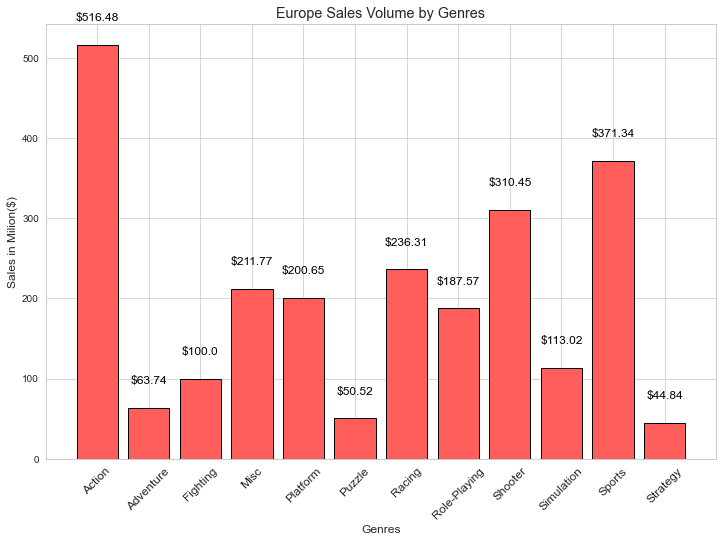

In [38]:
# Creating a bar chart to display sales for Europe by Genre
genre_list_EU = df.groupby('Genre').sum()['EU_Sales']
genre_index_EU = genre_list_EU.index

plt.bar(genre_index_EU,genre_list_EU,color='#FF5E5B',edgecolor='black',linewidth=1)
plt.xticks(genre_index_EU,rotation = '45', size = 12)
plt.ylabel('Sales in Milion($)')
plt.xlabel('Genres')
plt.title('Europe Sales Volume by Genres')

for k, v in genre_list_EU.items():
        plt.text (k, v+30, '$' + str(round(v,2)), fontsize = 12, rotation = 0, color = 'black', ha = 'center')
    
plt.show()

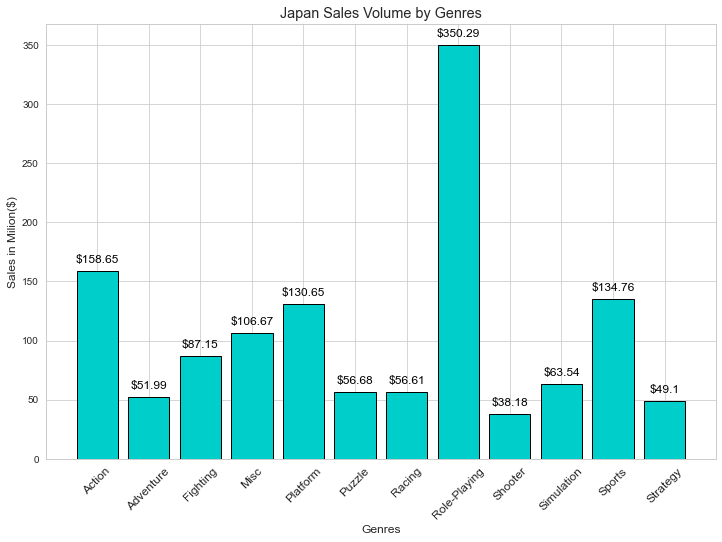

In [39]:
# Creating a bar chart to display sales for Japan by Genre
genre_list_JP = df.groupby('Genre').sum()['JP_Sales']
genre_index_JP = genre_list_JP.index

plt.bar(genre_index_JP,genre_list_JP,color='#00CECB',edgecolor='black',linewidth=1)
plt.xticks(genre_index_JP,rotation = '45', size = 12)
plt.ylabel('Sales in Milion($)')
plt.xlabel('Genres')
plt.title('Japan Sales Volume by Genres')

for k, v in genre_list_JP.items():
        plt.text (k, v+7, '$' + str(round(v,2)), fontsize = 12, rotation = 0, color = 'black', ha = 'center')
    
plt.show()

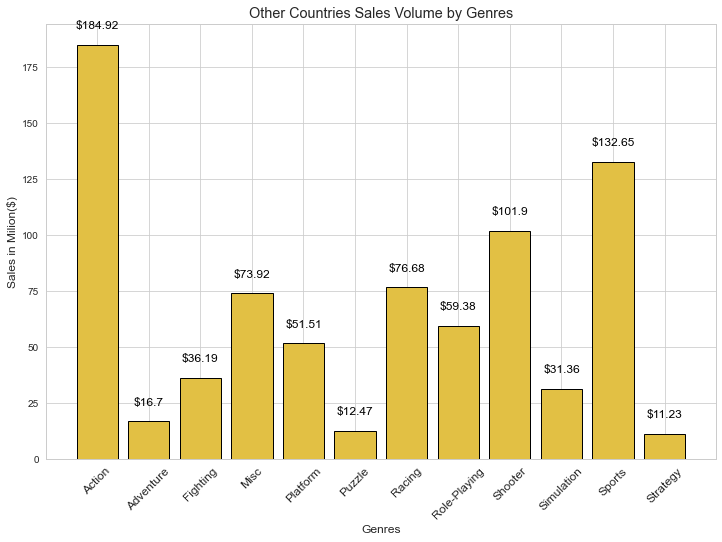

In [44]:
# Creating a bar chart to display sales for Other Countries by Genre
genre_list_OT = df.groupby('Genre').sum()['Other_Sales']
genre_index_OT = genre_list_OT.index

plt.bar(genre_index_OT,genre_list_OT,color='#E2C044',edgecolor='black',linewidth=1)
plt.xticks(genre_index_OT,rotation = '45', size = 12)
plt.ylabel('Sales in Milion($)')
plt.xlabel('Genres')
plt.title('Other Countries Sales Volume by Genres')

for k, v in genre_list_OT.items():
        plt.text (k, v+7, '$' + str(round(v,2)), fontsize = 12, rotation = 0, color = 'black', ha = 'center')
    
plt.show()

### Answer for question 6

For North America and Europe, Action is the most popular genre. On the other hand, in Japan the most popular genre is Role-Playing

***
## Conclusion

- The most popular video games genre are: Action, Sports, and Misc
- Most of the games has been produced for DS, PS2 & PS3
- The most 3 purchased games have been: Wii Sports, Super Mario Bros & Mario Kart. All of them were produced by Nintendo
- For the video games industry, North America is the biggest market
- For Europe and North America, Action video games are the most popular. Instead, Role-Playing videogames are the most popular in Japan.